In [34]:
import numpy as np
from scipy.integrate import ode
from scipy.stats import norm
from matplotlib import pyplot as plt
import scipy.optimize


[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152] [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
 0.0202184  0.83261985 0.77815675 0.87001215]


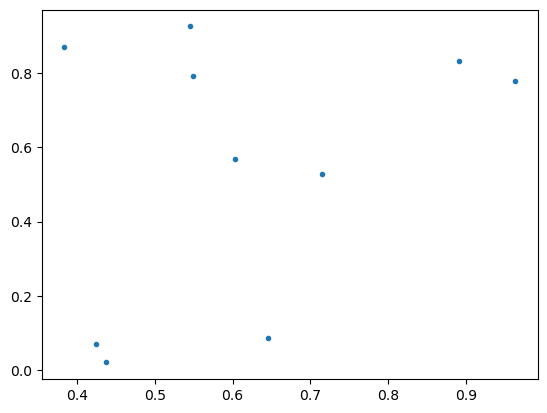

In [35]:
def generate_random_sample(num_points):
    x = np.random.rand(num_points)  
    y = np.random.rand(num_points)  
    return x,y   
        
# Set a seed
np.random.seed(0)

# Set number of points to draw
num_points = 10

# Draw random points
x, y = generate_random_sample(num_points)

# Visualize
plt.plot(x, y, ".")


print(x, y)

In [3]:
def generate_random_walk(num_steps):
    
    step_size = 0.5*np.ones(num_steps)
   
    x_r = np.random.rand(num_steps) - 0.5
    y_r = np.random.rand(num_steps) - 0.5
    
    x_t = np.zeros(num_steps+1)
    y_t = np.zeros(num_steps+1)
        
    for step in range(num_steps):
        x_t[step+1] = x_t[step] + x_r[step]*step_size[step]
        y_t[step+1] = y_t[step] + y_r[step]*step_size[step]

        while x_t[step + 1] > 1 or x_t[step + 1] < 0:
            x_t[step+1] = x_t[step] + np.random.rand()*step_size[step]

        while y_t[step + 1] > 1 or y_t[step + 1] < 0:
            y_t[step+1] = y_t[step] + np.random.rand()*step_size[step]


        
    return x_t,y_t   
      
    
    
#np.random.seed(2)
num_steps = 100   # number of steps in random walk

# Generate the random walk
x, y = generate_random_walk(num_steps)

# Visualize
plt.plot(x[0], y[0], "o", color = 'red')
plt.plot(x[-1], y[-1], "o", color = 'green')

plt.plot(x, y, ".-", color = 'grey')

In [36]:
#Markovian chain

t_m = np.array([[ 0.2, 0.6, 0.2], [ .6, 0.3, 0.1], [0.8, 0.2, 0]])
# Initial state, p0
p0 = np.array([0, 1, 0])

n_steps = 5
p_n = np.zeros((n_steps,3))

p_n[0]=p0

for n in range(1,n_steps):
    p_n[n] = np.dot(t_m,p_n[n-1])

print(p_n)

[[0.     1.     0.    ]
 [0.6    0.3    0.2   ]
 [0.34   0.47   0.54  ]
 [0.458  0.399  0.366 ]
 [0.4042 0.4311 0.4462]]


In [51]:
#Likelihood 
def compute_likelihood_normal(theta,x):
    p_data = norm.pdf(x, theta[0], theta[1])
    likelihood = -np.sum(np.log(p_data)) 
    return likelihood


def optimize_likelihood(loss_func, theta_i, args):
    bnds = ((None, None), (0, None))
    ftol = 10e-6
    res = scipy.optimize.minimize(loss_func, theta_i, args=args, method = 'Nelder-Mead', bounds = bnds, tol = ftol)
    return res.fun, res.x


# Set random seed
np.random.seed(0)

# Generate data
true_mean = 5
true_standard_dev = 1
n_samples = 1000
x = np.random.normal(true_mean, true_standard_dev, size=(n_samples, ))

method = 'Nelder-Mead'
fun, params = optimize_likelihood(compute_likelihood_normal, (2,2), x)
print(params[0]/true_mean , params[1]/true_standard_dev) 
print(fun, params)

0.9909479240267423 0.9870316126562043
1405.8868885104262 [4.95473962 0.98703161]
